In [1]:
import pandas as pd 
import requests
import json
import datetime as dt
from datetime import datetime

In [2]:
raw_text = requests.get('https://api.llama.fi/lite/protocols2').text
json_data = json.loads(raw_text)
df = pd.DataFrame(json_data.get('protocols'))
df

,category,chains,oracles,mcap,name,symbol,logo,tvl,tvlPrevDay,tvlPrevWeek,tvlPrevMonth,chainTvls,parentProtocol,forkedFrom,listedAt
0,CDP,[Ethereum],[Maker],9.248744e+08,MakerDAO,MKR,https://icons.llama.fi/makerdao.jpg,8.666080e+09,8.521872e+09,7.303266e+09,7.716494e+09,"{'Ethereum': {'tvl': 8666080020.854136, 'tvlPr...",NaN,NaN,NaN
1,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra ...",NaN,8.601239e+08,Lido,LDO,https://icons.llama.fi/lido.png,6.957522e+09,6.760504e+09,4.498190e+09,4.710452e+09,"{'Ethereum': {'tvl': 6834974243.883572, 'tvlPr...",NaN,NaN,NaN
2,Dexes,"[Ethereum, Polygon, Avalanche, Fantom, Arbitru...",[],4.874247e+08,Curve,CRV,https://icons.llama.fi/curve.png,5.992437e+09,5.850475e+09,5.004509e+09,5.051181e+09,"{'Optimism': {'tvl': 11149157.624597156, 'tvlP...",NaN,NaN,NaN
3,Dexes,"[Ethereum, Polygon, Arbitrum, Optimism, Celo]",[],3.397474e+09,Uniswap,UNI,https://icons.llama.fi/uniswap.png,5.939831e+09,5.925136e+09,4.769252e+09,4.844916e+09,"{'Optimism': {'tvl': 41328492.87560407, 'tvlPr...",NaN,NaN,NaN
4,Bridge,[Ethereum],[],5.658572e+09,WBTC,WBTC,https://icons.llama.fi/wbtc.png,5.655626e+09,5.257923e+09,4.772236e+09,5.376280e+09,"{'Ethereum': {'tvl': 5655626017.540429, 'tvlPr...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1729,Liquid Staking,[Ethereum],[],7.893546e+06,SideShift,XAI,https://icons.llama.fi/sideshift.png,0.000000e+00,NaN,NaN,NaN,"{'Ethereum': {'tvl': 0, 'tvlPrevDay': None, 't...",NaN,[],1.657711e+09
1730,Launchpad,[BSC],[],0.000000e+00,Uplift DAO,LIFT,https://icons.llama.fi/uplift-dao.jpg,0.000000e+00,NaN,NaN,NaN,"{'BSC': {'tvl': 0, 'tvlPrevDay': None, 'tvlPre...",NaN,[],1.657718e+09
1731,Algo-Stables,[BSC],[],NaN,Waterfall WTF,WTF,https://icons.llama.fi/waterfall-wtf.jpg,0.000000e+00,NaN,NaN,NaN,"{'BSC': {'tvl': 0, 'tvlPrevDay': None, 'tvlPre...",Waterfall Finance,[Tomb Finance],1.657791e+09
1732,Staking,[BSC],[],0.000000e+00,Bitgert,BRISE,https://icons.llama.fi/bitgert.jpg,0.000000e+00,NaN,NaN,NaN,"{'BSC': {'tvl': 0, 'tvlPrevDay': None, 'tvlPre...",NaN,[],1.658136e+09


In [3]:
df = df[df['symbol']!='-'] #remove defi that do not have a symbol
df = df[df['tvl']>1e7] #only chose defi with tvl above 1M USD
df

,category,chains,oracles,mcap,name,symbol,logo,tvl,tvlPrevDay,tvlPrevWeek,tvlPrevMonth,chainTvls,parentProtocol,forkedFrom,listedAt
0,CDP,[Ethereum],[Maker],9.248744e+08,MakerDAO,MKR,https://icons.llama.fi/makerdao.jpg,8.666080e+09,8.521872e+09,7.303266e+09,7.716494e+09,"{'Ethereum': {'tvl': 8666080020.854136, 'tvlPr...",NaN,NaN,NaN
1,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra ...",NaN,8.601239e+08,Lido,LDO,https://icons.llama.fi/lido.png,6.957522e+09,6.760504e+09,4.498190e+09,4.710452e+09,"{'Ethereum': {'tvl': 6834974243.883572, 'tvlPr...",NaN,NaN,NaN
2,Dexes,"[Ethereum, Polygon, Avalanche, Fantom, Arbitru...",[],4.874247e+08,Curve,CRV,https://icons.llama.fi/curve.png,5.992437e+09,5.850475e+09,5.004509e+09,5.051181e+09,"{'Optimism': {'tvl': 11149157.624597156, 'tvlP...",NaN,NaN,NaN
3,Dexes,"[Ethereum, Polygon, Arbitrum, Optimism, Celo]",[],3.397474e+09,Uniswap,UNI,https://icons.llama.fi/uniswap.png,5.939831e+09,5.925136e+09,4.769252e+09,4.844916e+09,"{'Optimism': {'tvl': 41328492.87560407, 'tvlPr...",NaN,NaN,NaN
4,Bridge,[Ethereum],[],5.658572e+09,WBTC,WBTC,https://icons.llama.fi/wbtc.png,5.655626e+09,5.257923e+09,4.772236e+09,5.376280e+09,"{'Ethereum': {'tvl': 5655626017.540429, 'tvlPr...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,Dexes,[Klaytn],NaN,NaN,Pala,PALA,https://icons.llama.fi/pala.jpg,1.060598e+07,1.056911e+07,1.021035e+07,1.687357e+07,"{'Klaytn': {'tvl': 10605984.319829745, 'tvlPre...",NaN,NaN,1.640256e+09
335,Yield,"[Polygon, Fantom]",[Internal],1.714560e+06,Tetu,TETU,https://icons.llama.fi/tetu.svg,1.048730e+07,1.053138e+07,8.088299e+06,8.767348e+06,"{'Polygon': {'tvl': 5404024.684876664, 'tvlPre...",NaN,[Harvest Finance],NaN
336,Gaming,"[Polygon, Ethereum]",NaN,6.337454e+07,Aavegotchi,GHST,https://icons.llama.fi/aavegotchi.png,1.026051e+07,1.033144e+07,9.991098e+06,1.029367e+07,"{'pool2': {'tvl': 3405401.7914703595, 'tvlPrev...",NaN,NaN,1.634321e+09
338,Yield,"[Wanchain, Avalanche]",NaN,4.735923e+06,Zookeeper,ZOO,https://icons.llama.fi/zookeeper.png,1.003935e+07,9.724447e+06,8.377508e+06,8.582701e+06,"{'Wanchain': {'tvl': 8630142.124731304, 'tvlPr...",NaN,NaN,NaN


In [4]:
#Identify defi that have the same symbol
empty_set = set()
to_check = set()
for i in df['symbol']:
    if i in empty_set:
        to_check.add(i)
    else:
        empty_set.add(i)  
        
to_check = list(to_check)
to_check

['JST', 'SUN', 'IZI', 'DFI', 'SUSHI', 'BOX', 'ACA', 'AAVE', 'QI']

In [5]:
defis_to_add = []
for i in to_check:
    defis_to_add.append((df
                         [df['symbol']==i]
                         .set_index('name')
                         ['tvl']
                         .sort_values(ascending=False)
                         .index
                         [0])
                      )
defis_to_add

['JustLend',
 'SUNSwap',
 'iziSwap',
 'DefiChain DEX',
 'SushiSwap',
 'Bwatch',
 'Acala LCDOT',
 'AAVE V2',
 'Benqi Lending']

In [6]:
# remove duplicates from the df 
for i in to_check:
    df = df[df['symbol']!=i]
df

,category,chains,oracles,mcap,name,symbol,logo,tvl,tvlPrevDay,tvlPrevWeek,tvlPrevMonth,chainTvls,parentProtocol,forkedFrom,listedAt
0,CDP,[Ethereum],[Maker],9.248744e+08,MakerDAO,MKR,https://icons.llama.fi/makerdao.jpg,8.666080e+09,8.521872e+09,7.303266e+09,7.716494e+09,"{'Ethereum': {'tvl': 8666080020.854136, 'tvlPr...",NaN,NaN,NaN
1,Liquid Staking,"[Ethereum, Solana, Moonbeam, Moonriver, Terra ...",NaN,8.601239e+08,Lido,LDO,https://icons.llama.fi/lido.png,6.957522e+09,6.760504e+09,4.498190e+09,4.710452e+09,"{'Ethereum': {'tvl': 6834974243.883572, 'tvlPr...",NaN,NaN,NaN
2,Dexes,"[Ethereum, Polygon, Avalanche, Fantom, Arbitru...",[],4.874247e+08,Curve,CRV,https://icons.llama.fi/curve.png,5.992437e+09,5.850475e+09,5.004509e+09,5.051181e+09,"{'Optimism': {'tvl': 11149157.624597156, 'tvlP...",NaN,NaN,NaN
3,Dexes,"[Ethereum, Polygon, Arbitrum, Optimism, Celo]",[],3.397474e+09,Uniswap,UNI,https://icons.llama.fi/uniswap.png,5.939831e+09,5.925136e+09,4.769252e+09,4.844916e+09,"{'Optimism': {'tvl': 41328492.87560407, 'tvlPr...",NaN,NaN,NaN
4,Bridge,[Ethereum],[],5.658572e+09,WBTC,WBTC,https://icons.llama.fi/wbtc.png,5.655626e+09,5.257923e+09,4.772236e+09,5.376280e+09,"{'Ethereum': {'tvl': 5655626017.540429, 'tvlPr...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,Dexes,[Klaytn],NaN,NaN,Pala,PALA,https://icons.llama.fi/pala.jpg,1.060598e+07,1.056911e+07,1.021035e+07,1.687357e+07,"{'Klaytn': {'tvl': 10605984.319829745, 'tvlPre...",NaN,NaN,1.640256e+09
335,Yield,"[Polygon, Fantom]",[Internal],1.714560e+06,Tetu,TETU,https://icons.llama.fi/tetu.svg,1.048730e+07,1.053138e+07,8.088299e+06,8.767348e+06,"{'Polygon': {'tvl': 5404024.684876664, 'tvlPre...",NaN,[Harvest Finance],NaN
336,Gaming,"[Polygon, Ethereum]",NaN,6.337454e+07,Aavegotchi,GHST,https://icons.llama.fi/aavegotchi.png,1.026051e+07,1.033144e+07,9.991098e+06,1.029367e+07,"{'pool2': {'tvl': 3405401.7914703595, 'tvlPrev...",NaN,NaN,1.634321e+09
338,Yield,"[Wanchain, Avalanche]",NaN,4.735923e+06,Zookeeper,ZOO,https://icons.llama.fi/zookeeper.png,1.003935e+07,9.724447e+06,8.377508e+06,8.582701e+06,"{'Wanchain': {'tvl': 8630142.124731304, 'tvlPr...",NaN,NaN,NaN


In [7]:
defis_to_scrap = list(df['name'])
for i in defis_to_add:
    defis_to_scrap.append(i)
defis_to_scrap

['MakerDAO',
 'Lido',
 'Curve',
 'Uniswap',
 'WBTC',
 'Convex Finance',
 'PancakeSwap',
 'Compound',
 'Instadapp',
 'Multichain',
 'Balancer',
 'Frax',
 'JustStables',
 'hBTC',
 'VVS Finance',
 'Venus',
 'Vires Finance',
 'Iron Bank',
 'Yearn Finance',
 'Liquity',
 'dYdX',
 'Keep3r Network',
 'Alpaca Finance',
 'Synthetix',
 'Stargate',
 'Rocket Pool',
 'Tornado Cash',
 'Abracadabra',
 'Quickswap',
 'Marinade Finance',
 'Olympus DAO',
 'Solend',
 'Serum',
 'GMX',
 'Beefy Finance',
 'UniCrypt',
 'BiSwap',
 'Tectonic',
 'Armor',
 'Flexa',
 'Nexus Mutual',
 'Ref Finance',
 'cBridge',
 'Raydium',
 'Trader Joe',
 'Synapse',
 'Coinwind',
 'KlaySwap',
 'PinkSale',
 'Platypus Finance',
 'Loopring',
 'Osmosis',
 'Bancor',
 'Tulip Protocol',
 'Wonderland',
 'Kava',
 'Maiar Exchange',
 'DODO',
 'Thorchain',
 'Neutrino',
 'RenVM',
 'Chainge Finance',
 'Tokemak',
 'MDEX',
 'Mango Markets',
 'Alchemix',
 'Bastion',
 'StakeWise',
 'StakeDAO',
 'Allbridge',
 'Sunny',
 'SpookySwap',
 'Kava Lend',
 'Moo

In [21]:
all_dates = pd.date_range(dt.datetime.today()- dt.timedelta(days = 1887), periods=1887).strftime('%Y-%m-%d').tolist()
all_tvl = pd.DataFrame(index=pd.to_datetime(all_dates))

for i in defis_to_scrap:
    defi_name = i.replace(' ','-').lower()
    try:
        
        temp_text = requests.get('https://api.llama.fi/updatedProtocol/'+defi_name).text
        temp_data = json.loads(temp_text)

        # get name, nb of days present and tvl data 
        symbol_defi = temp_data.get('symbol')
        temp = pd.DataFrame(temp_data.get('chainTvls')).iloc[:,0]['tvl']
        temp_df = pd.DataFrame(temp)

        date_index = pd.to_datetime([datetime.utcfromtimestamp(i) for i in temp_df['date']])
        #date_index.sort()

        #put all data into df
        tvl_data = pd.DataFrame()
        tvl_data['TVL'] = temp_df['totalLiquidityUSD']
        tvl_data['Date'] = date_index
        tvl_data = tvl_data.set_index('Date')
        
        #merge
        all_tvl[symbol_defi] = tvl_data
        
    except:
        print('Did not find: '+defi_name)

Did not find: bakeryswap


In [23]:
all_tvl

,MKR,LDO,CRV,UNI,WBTC,CVX,CAKE,COMP,INST,MULTI,...,APT,JST,SUN,IZI,DFI,SUSHI,BOX,ACA,AAVE,QI
2017-05-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-05-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-15,7.702957e+09,5.057423e+09,1.132165e+07,3.729756e+07,4.876997e+09,3.473583e+09,2.835142e+09,2.582726e+09,1.607391e+09,5.299119e+06,...,9.582194e+06,0.0,8.261474e+08,2.186402e+07,3.713891e+08,24007.397559,1.751502e+08,1.624343e+08,9.010870e+07,3.218112e+06
2022-07-16,7.814349e+09,5.198758e+09,1.150316e+07,3.667596e+07,4.934269e+09,3.493994e+09,2.839128e+09,2.625809e+09,1.676746e+09,5.429915e+06,...,1.069435e+07,0.0,8.287020e+08,2.182703e+07,3.761659e+08,23517.634448,1.772744e+08,1.625017e+08,8.940101e+07,3.167062e+06
2022-07-17,8.117589e+09,5.800399e+09,1.132809e+07,3.863937e+07,5.073635e+09,3.619310e+09,2.885008e+09,2.875192e+09,1.805320e+09,5.857712e+06,...,1.108080e+07,0.0,8.397379e+08,2.184641e+07,3.850910e+08,23845.945438,1.834676e+08,1.734931e+08,9.380718e+07,3.433596e+06
2022-07-18,8.060240e+09,5.753443e+09,1.123923e+07,3.823835e+07,4.949678e+09,3.604588e+09,2.884780e+09,2.706204e+09,1.770783e+09,5.912358e+06,...,1.063085e+07,0.0,8.277339e+08,2.183668e+07,3.804844e+08,23623.926176,1.793406e+08,1.677198e+08,9.030091e+07,3.308012e+06


<AxesSubplot:>

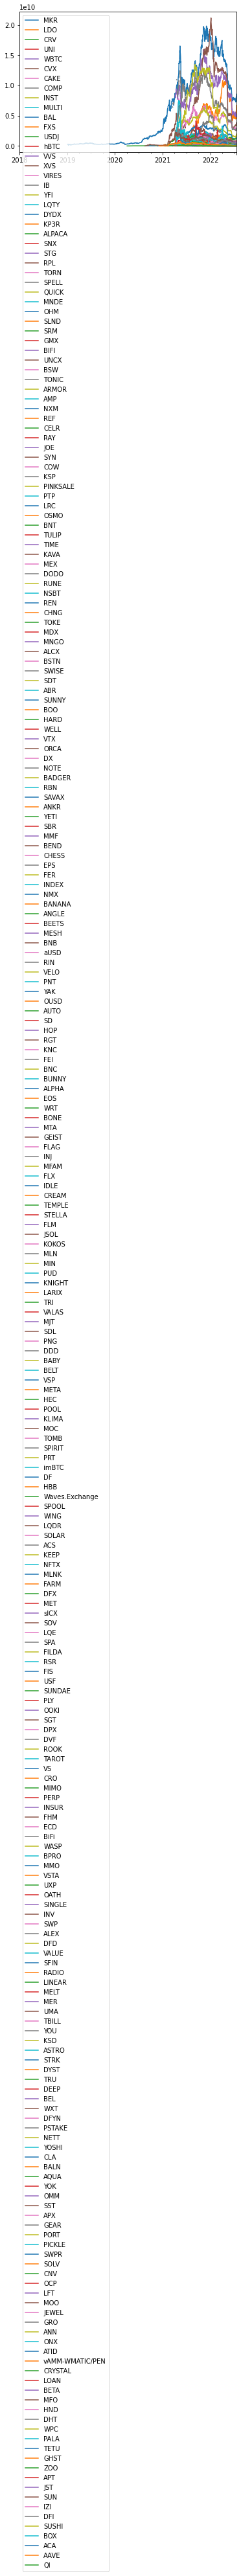

In [25]:
all_tvl.loc['2018':].plot()

In [126]:
all_tvl.to_excel("TVL_DefiLama.xlsx")  

In [26]:
all_tvl.to_csv("TVL_DefiLama.csv")  